In [0]:
! git clone https://github.com/jainkrunal/HandGestureRecognition


fatal: destination path 'HandGestureRecognition' already exists and is not an empty directory.


In [0]:

import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
from PIL import Image

import random
import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


In [0]:
labels_dict={"1":"one","2":"two","3":"three","4":"four","5":"five"}
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)]
        for f in file_names:
            images.append(Image.open(f))

            labels.append(int(d)-1)
    return images, labels
  
#start = timer()

ROOT_PATH="HandGestureRecognition/Data"
train_data_directory=os.path.join(ROOT_PATH, "train")
test_data_directory=os.path.join(ROOT_PATH, "test")

train_data, train_labels=load_data(train_data_directory)
test_data, test_labels=load_data(test_data_directory)
#timer() - start

In [0]:
#  Resize
def image_resize(images):
  images32 = [np.asarray(image.resize((28,28))) for image in images]
  images32 = np.array(images32)
  return images32
#start = timer()
train_data = image_resize(train_data)
test_data = image_resize(test_data)
#timer() - start

train_data, test_data = train_data / 255.0, test_data / 255.0

In [0]:
test_labels


[3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4]

In [0]:

train_labels = to_categorical(train_labels, num_classes = 5)

test_labels = to_categorical(test_labels, num_classes = 5)

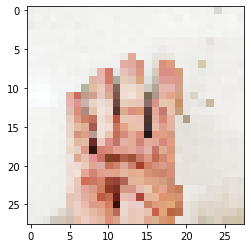

In [0]:
#train_data = rgb2gray(np.array(train_data))
#test_data = rgb2gray(np.array(test_data))
plt.imshow(train_data[0])



In [0]:
train_data.shape


(82, 28, 28, 3)

In [0]:
"""model=Sequential()
model.add(Convolution2D(32, (3, 3), strides=(2, 2), activation='relu', input_shape=(300,300,3))) 
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
"""

model = Sequential()



model.add(Convolution2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,3)))
model.add(Convolution2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Convolution2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation = "softmax"))

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
#model.get_config()

In [0]:
model.fit(train_data, train_labels, epochs=100)


Train on 82 samples
Epoch 1/100
82/82 [==============================] - 0s 2ms/sample - loss: 1.6374 - acc: 0.1951
Epoch 2/100
82/82 [==============================] - 0s 262us/sample - loss: 1.5288 - acc: 0.2439
Epoch 3/100
82/82 [==============================] - 0s 257us/sample - loss: 1.4938 - acc: 0.1341
Epoch 4/100
82/82 [==============================] - 0s 231us/sample - loss: 1.4410 - acc: 0.3049
Epoch 5/100
82/82 [==============================] - 0s 235us/sample - loss: 1.4819 - acc: 0.2805
Epoch 6/100
82/82 [==============================] - 0s 225us/sample - loss: 1.4617 - acc: 0.2317
Epoch 7/100
82/82 [==============================] - 0s 243us/sample - loss: 1.4370 - acc: 0.3415
Epoch 8/100
82/82 [==============================] - 0s 228us/sample - loss: 1.4348 - acc: 0.3049
Epoch 9/100
82/82 [==============================] - 0s 241us/sample - loss: 1.3915 - acc: 0.3537
Epoch 10/100
82/82 [==============================] - 0s 324us/sample - loss: 1.3512 - acc: 0.3049
E

[6.547781467437744, 0.48]

In [0]:
test_labels
model.evaluate(test_data,test_labels)

25/25 [==============================] - 0s 472us/sample - loss: 6.5478 - acc: 0.4800


[6.547781467437744, 0.48]

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
images_flat:  Tensor("Flatten_5/flatten/Reshape:0", shape=(?, 784), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 100), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


EPOCH 0


ValueError: ignored

In [0]:
sample_indexes = random.sample(range(len(test_data)), 10)
sample_images = [test_data[i] for i in sample_indexes]
sample_labels = [test_labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = model.predict(test_data)
                        
# Print the real and predicted labels
print(test_labels)
print(predicted)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
[[4.32998361e-03 2.18374657e-06 8.18890985e-05 9.94535327e-01
  1.05059589e-03]
 [1.49073848e-03 4.14780334e-05 1.00675388e-03 9.95560765e-01
  1.90030097e-03]
 [1.59421485e-04 7.04447120e-06 1.56217651e-03 9.98216689e-01
  5.45738512e-05]
 [1.49115658e-04 8.75844853e-06 2.20163332e-04 9.97176170e-01
  2.44584889e-03]
 [8.95319772e-06 1.09812994e-08 1.52176490e-05 9.99965787e-01
  1.00026846e-05]
 [9.99998450e-01 1.44961086e-06 6.16941766e-24 8.78052882e-16
  1.76814964e-07]
 [4.12751399e-02 1.88803230e-03 3.11744693e-11 1.12758791e-02
  9.455

In [0]:
count=0
for i in range(len(predicted)):
  if np.where(predicted[i]==max(predicted[i]))==np.where(test_labels[i]==max(test_labels[i])):
    count+=1
count,len(predicted)

(12, 25)

In [0]:
np.where(predicted[i]==max(predicted[i]))

(array([4]),)

ValueError: ignored

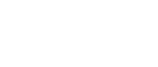

In [0]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(15, 15))
for i in range(len(test_data)):
    truth = test_labels[i]
    prediction = predicted[i]
    plt.subplot(13, 5,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(chr(truth), chr(prediction)), 
             fontsize=12, color=color)
    plt.imshow(test_data[i],cmap='gray')

plt.show()

In [0]:
sess.close()